In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import requests
url="https://raw.githubusercontent.com/NishiSaxena2023/gilbert_projects/main/National_waterways_gilbert.csv"




In [2]:
df = pd.read_csv(url)
df
X=df['YEAR']
Y1=df['National Waterways- I']
Y2=df['National Waterways- II']
Y3=df['National Waterways-III']

In [3]:
df.head()

,YEAR,National Waterways- I,National Waterways- II,National Waterways-III,Total
0,2003-04,1596,296,219,2111
1,2004-05,3119,381,154,3654
2,2005-06,4109,322,169,4600
3,2006-07,5803,1728,149,7680
4,2007-08,7092,422,89,7603


In [5]:
df_new=df[['National Waterways- I', 'National Waterways- II',
       'National Waterways-III']]
df_new
matrix=df_new.to_numpy(dtype=float)
col1_mean=np.mean(matrix[:,0])
col2_mean=np.mean(matrix[:,1])
col3_mean=np.mean(matrix[:,2])
print(col1_mean)
print(col2_mean)
print(col3_mean)

9060.727272727272
520.4545454545455
137.72727272727272


In [6]:

K_matrix=matrix
K_matrix[:,0]=K_matrix[:,0]-col1_mean
K_matrix[:,1]=K_matrix[:,1]-col2_mean
K_matrix[:,2]=K_matrix[:,2]-col3_mean
K_matrix

array([[-7.46472727e+03, -2.24454545e+02,  8.12727273e+01],
       [-5.94172727e+03, -1.39454545e+02,  1.62727273e+01],
       [-4.95172727e+03, -1.98454545e+02,  3.12727273e+01],
       [-3.25772727e+03,  1.20754545e+03,  1.12727273e+01],
       [-1.96872727e+03, -9.84545455e+01, -4.87272727e+01],
       [-1.99272727e+03, -3.78454545e+02, -2.87272727e+01],
       [ 1.34127273e+03, -4.46454545e+02, -4.07272727e+01],
       [ 3.24127273e+03,  5.25454545e+01,  4.27272727e+00],
       [ 5.48527273e+03,  9.25454545e+01, -5.72727273e+00],
       [ 6.05827273e+03,  5.95454545e+01,  1.27272727e+00],
       [ 9.45127273e+03,  7.35454545e+01, -2.17272727e+01]])

In [7]:
matrix=df_new.to_numpy(dtype=float)
matrix

array([[ 1596.,   296.,   219.],
       [ 3119.,   381.,   154.],
       [ 4109.,   322.,   169.],
       [ 5803.,  1728.,   149.],
       [ 7092.,   422.,    89.],
       [ 7068.,   142.,   109.],
       [10402.,    74.,    97.],
       [12302.,   573.,   142.],
       [14546.,   613.,   132.],
       [15119.,   580.,   139.],
       [18512.,   594.,   116.]])

In [8]:
x=matrix[:,0]
y=matrix[:,1]
z=matrix[:,2]
print(x)
print(y)
print(z)

[ 1596.  3119.  4109.  5803.  7092.  7068. 10402. 12302. 14546. 15119.
 18512.]
[ 296.  381.  322. 1728.  422.  142.   74.  573.  613.  580.  594.]
[219. 154. 169. 149.  89. 109.  97. 142. 132. 139. 116.]


In [9]:
cov_mat=np.stack((x,y,z),axis=0)
cov_mat=np.cov(cov_mat)
cov_mat

array([[ 3.02427818e+07,  1.63589336e+05, -1.01160082e+05],
       [ 1.63589336e+05,  1.93990073e+05,  1.89193636e+03],
       [-1.01160082e+05,  1.89193636e+03,  1.33581818e+03]])

In [10]:
eigen_val,eigen_vector=np.linalg.eig(cov_mat)
print(eigen_val)
print(eigen_vector)
vector_1=eigen_vector[:,0]
vector_2=eigen_vector[:,1]
vector_3=eigen_vector[:,2]
A1=eigen_val[0]
A2=eigen_val[1]
A3=eigen_val[2]
trace=A1+A2+A3
A1_percent=(A1/trace)*100
A2_percent=(A2/trace)*100
A3_percent=(A3/trace)*100
print("A1%",A1_percent)
print("A2%",A2_percent)
print("A3%",A3_percent)
vector_1

[3.02440107e+07 1.93130551e+05 9.66469315e+02]
[[ 0.99997959  0.00540065  0.00341342]
 [ 0.00544358 -0.99990461 -0.01269364]
 [-0.00334454 -0.01271196  0.99991361]]
A1% 99.36232231447228
A2% 0.6345024903921952
A3% 0.003175195135524634


array([ 0.99997959,  0.00544358, -0.00334454])

In [11]:
z=np.matmul(K_matrix,vector_1)
print(z)

[-7466.06857746 -5942.41956196 -4952.81110653 -3251.12511693
 -1969.06006709 -1994.65067019  1338.95125575  3241.47831975
  5485.68370948  6058.468965    9451.55285019]


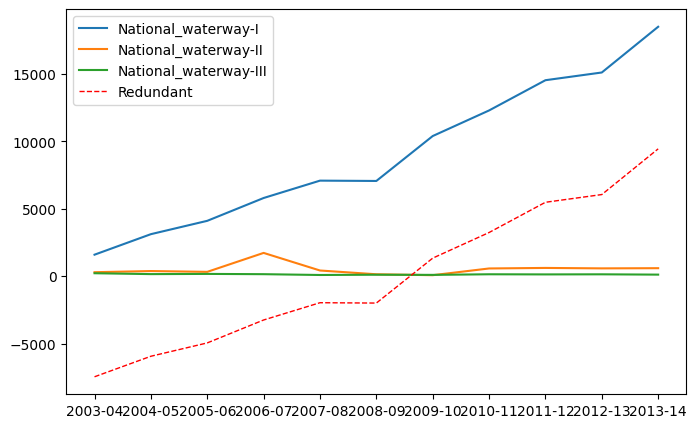

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
plt.plot(X,Y1)
plt.plot(X,Y2)
plt.plot(X,Y3)
plt.plot(X, z,
         color='red',
         linewidth=1.0,
         linestyle='--'
        )
labels=['National_waterway-I','National_waterway-II','National_waterway-III','Redundant']
plt.legend(labels)
plt.show()